# 🌟 HuggingFace Transformers Library

🔗 [https://huggingface.co](https://huggingface.co)

The HuggingFace Transformers library provides APIs at two different levels to make working with state-of-the-art models easier.

---

## 🚀 High-Level API: `pipeline`

The high-level API for using open-source models for typical inference tasks is called **`pipeline`**.

You can create and use a pipeline with just a few lines of code:

```python
from transformers import pipeline

# Define the task you want to perform
my_pipeline = pipeline("the_task_I_want_to_do")

# Run the pipeline on your input
result = my_pipeline(my_input)



🛑 Common Runtime Error in Google Colab

While running a notebook, you might encounter an error like this:

Runtime error: CUDA is required but not available for bitsandbytes. Please consider installing [...]

    ⚠️ Don’t be misled!
    This message might suggest that a package version issue is the cause, but that’s usually not true.

💡 What’s Actually Happening:

Google Colab may silently switch your runtime environment—especially during high demand. This results in losing access to the GPU, which triggers that misleading error.  
  
✅ How to Fix It

Follow these steps to resolve the issue:

    Kernel menu → Disconnect and delete runtime

    Reload the Colab notebook

    Edit menu → Clear all outputs

    Reconnect to a GPU:

        Click the "Connect" button in the top-right corner

        Select "Change runtime type" if needed, and ensure GPU is selected

    Confirm GPU availability:

        Click "View resources" in the top-right menu

        Check that a GPU (like a T4) is listed

    Rerun all cells from the top, starting with the pip install commands

🧠 Pro Tip: Always run the install and setup cells at the beginning after resetting the runtime to ensure everything loads correctly.
  
  

# 🔥 All Available Pipelines

Here’s a list of all the pipelines available from **Transformers** and **Diffusers**.

---

### 🌟 Transformers Pipelines
You can explore the available pipelines under the *Tasks* section on the HuggingFace Transformers documentation page.

- Visit: [Transformers Pipelines Documentation](https://huggingface.co/docs/transformers/main_classes/pipelines)
- Scroll down a bit, and expand the **parameters** section to see the list of **Tasks**.

### 🌟 Diffusion Pipelines
In case you’re interested in **Diffusion models** (e.g., image generation tasks), here’s the list for those.

- Visit: [Diffusers Pipelines Documentation](https://huggingface.co/docs/diffusers/en/api/pipelines/overview)

---

If you come across any cool examples of other pipelines, **please share them** with me! It’s amazing how HuggingFace makes this **advanced AI functionality** available for inference with such a **simple API**. 🤖✨


In [ ]:
# ------------------------------------ Packages ----------------------------------!
!pip install -q -U transformers datasets diffusers

In [ ]:
# ------------------------------------ Imports ----------------------------------
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
# ------------------------------------ Configure API Keys / Tokens ----------------------------------
# Retrieve stored API keys from Colab's secure userdata store
openai_api_key = userdata.get('OPENAI_API_KEY')
anthropic_api_key = userdata.get('ANTHROPIC_API_KEY')
google_api_key = userdata.get('GOOGLE_API_KEY')
hf_token = userdata.get('HF_TOKEN')

print("API Keys:")
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:10]}")
else:
    print("OpenAI API Key not set")

if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:10]}")
else:
    print("Anthropic API Key not set")
if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:10]}")
else:
    print("Google API Key not set")
if hf_token:
    print(f"Hugging Face Token exists and begins {hf_token[:10]}")
else:
  print("Hugging Face Token not set")


In [ ]:

# ------------------------------------ Connect to Hugging Face ----------------------------------
login(hf_token, add_to_git_credential=True)

# Request Access to HuggingFace Model:
# https://huggingface.co/black-forest-labs/FLUX.1-schnell

In [ ]:
# ------------------------------------ Sentiment Analysis ----------------------------------
classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("I'm super excited to go eat at Larry's Steakhouse!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9995794892311096}]


In [ ]:
# ------------------------------------ Name Entity Recognition (ner) ----------------------------------
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9992161), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.99864936), 'word': 'United States', 'start': 43, 'end': 56}]


In [ ]:
# ------------------------------------ Question Answering with Context ----------------------------------
question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question="Who found dinosaur bones in Raleigh, NC in 2023?", context="David Tran found dinosaur fossils in Raleigh, NC in 2023.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.9982373714447021, 'start': 0, 'end': 10, 'answer': 'David Tran'}


In [ ]:
# ------------------------------------ Text Summarization ----------------------------------
summarizer = pipeline("summarization", device="cuda")
text = """Common art themes reflect universal human experiences and concerns, transcending time and culture.
These often include the human condition, exploring aspects of identity, emotion, life, and death. Nature is
another pervasive theme, depicted in landscapes, seascapes, or as a symbol of growth, decay, or the sublime.
Religion and spirituality have historically been dominant, portraying deities, sacred narratives, and the
search for meaning. Social and political commentary frequently emerges, addressing conflict, injustice,
freedom, or the power dynamics within society. Finally, storytelling and history remain vital, with art
serving as a record of significant events, myths, and personal narratives.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 Common art themes reflect universal human experiences and concerns, transcending time and culture . These often include the human condition, exploring aspects of identity, emotion, life, and death . Religion and spirituality have historically been dominant, portraying deities, sacred


In [ ]:
# ------------------------------------ Translation ----------------------------------
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The finest Sushi in North Carolina is actually in a restaurant located inside of a gas station!")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Le meilleur Sushi de la Caroline du Nord se trouve en fait dans un restaurant situé à l'intérieur d'une station-service!


In [ ]:
# ------------------------------------ Translation w/a Specified Model ----------------------------------
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
result = translator("The finest Sushi in North Carolina is actually in a restaurant located inside of a gas station!")
print(result[0]['translation_text'])

Device set to use cuda


¡El sushi más fino de Carolina del Norte está en un restaurante ubicado dentro de una gasolinera!


In [ ]:
# ------------------------------------ Classification ----------------------------------
classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("UFO reports are currently circulating in Raleigh, NC.", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'UFO reports are currently circulating in Raleigh, NC.', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.38141345977783203, 0.35972484946250916, 0.2588616907596588]}


In [ ]:
# ------------------------------------ Text Generation ----------------------------------
generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I you should about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I you should about using HuggingFace pipelines, it's that they're fast, easy to use, and it's a very robust way to create a user-friendly interface.

Because HuggingFace is so good at handling small projects, its user interface is very clean and clean.

In a nutshell, you can create your own API, make a GitHub profile to see what's happening to your user, and you can easily add a new API.

Just to show you how easy it is to use HuggingFace, here are some example usage questions:

What is your favourite feature of HuggingFace?

What are your favourite features of HuggingFace?

What feature of HuggingFace do you use?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favourite feature of HuggingFace?

What is your favour

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

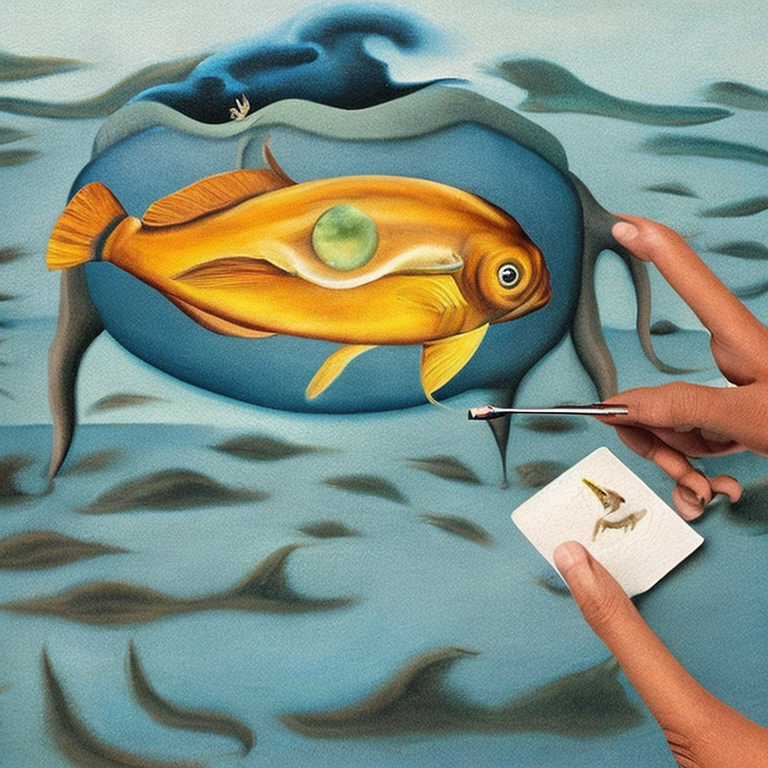

In [ ]:
# ------------------------------------ Image Generation ----------------------------------
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "A dog painting a picture of a fish, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]
image

In [ ]:
# ------------------------------------ Audio Generation ----------------------------------
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hello World, from the Hugging Face pipeline!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
